# Tarea 1: Homología Persistente

La siguiente actividad te ayudará a fortalecer los conceptos de homología persistente y filtraciones, y las paqueterías:
* `gudhi`
* `ripser`
* `giotto-tda`
* `scikit-tda`
* `tadasets`

La actividad está dividida en dos partes:

1. **Ejercicios de Práctica**: En esta sección se te proporcionarán ejercicios prácticos para que puedas aplicar los conceptos aprendidos en la teoría usando las paqueterías mencionadas.
2. **Caso Práctico:** Aplicar el concepto de homología persistente (diagramas, barcodes, imágenes de persistencia, distancias entre Diagramas) a un conjunto de datos reales. En esta sección se te proporcionará un conjunto de datos y se te pedirá que apliques los conceptos aprendidos para analizarlo y extraer información relevante.

## 1. Ejercicios de Práctica

En la siguiente sección se te proporcionarán ejercicios prácticos para que puedas:

- Construir filtraciones de bases de datos y graficarlas.
- Construir los diagramas de persistencia de bases de datos, interpretarlas.
- Construir otras visualizaciones de los diagramas de persistencia.
- Comparar diagramas de persistencia utilizando distancias Bottleneck y Wasserstein, e interpretarlas.

In [1]:
!pip install tadasets
!pip install ripser
!pip install persim
!pip install gudhi

In [2]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import tadasets # for generating sample data
from ripser import ripser # for computing persistence diagrams
import persim # for comparing persistence diagrams
import gudhi as gd # for computing persistence diagrams
import plotly.graph_objects as go # for plotting persistence diagrams


In [16]:
from itertools import product
import time
from sklearn import datasets
from scipy.stats import multivariate_normal as mvn
from ripser import Rips
from persim import PersistenceImager

### Ejercicio 1.1:

Utilizando una nube de puntos construidos con la paquetería `tadasets` por cada tipo en la paquetería  (escoge la dimensión, radio, número de puntos, ruido, etc). Con ayuda de la paquetería `gudhi` construye tres filtraciones (variando el `max_edge_length` y que al menos una filtración corresponda a `max_edge_length`= diámetro del conjunto) de la nube de puntos y grafícalas.

La paquetería `tadasets` contiene los siguientes tipos de objetos:

- torus

- d-sphere

- sphere

- swiss roll

- infinity sign

- eyeglasses

####1. Toro

<Axes3D: >

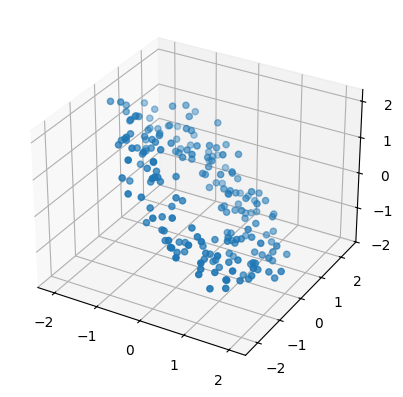

In [3]:
toro= tadasets.torus(200, c=3, a=1, ambient=10, noise=0.4, seed=42)
tadasets.plot3d(toro)

In [4]:
from scipy.spatial.distance import pdist

pairwise_dist = pdist(toro)
diameter = np.max(pairwise_dist)
print(f"Diámetro del conjunto: {diameter:.4f}")

Diámetro del conjunto: 9.3619


El diametro del conjunto es 9.3619, por lo tanto, podemos acotar el parámetro de Rips a 10 y con esto garantizamos que el último complejo simplicial será el que conecta a todos.

/usr/local/lib/python3.11/dist-packages/gudhi/persistence_graphical_tools.py:129: UserWarning: usetex mode requires TeX.
  warnings.warn("usetex mode requires TeX.")


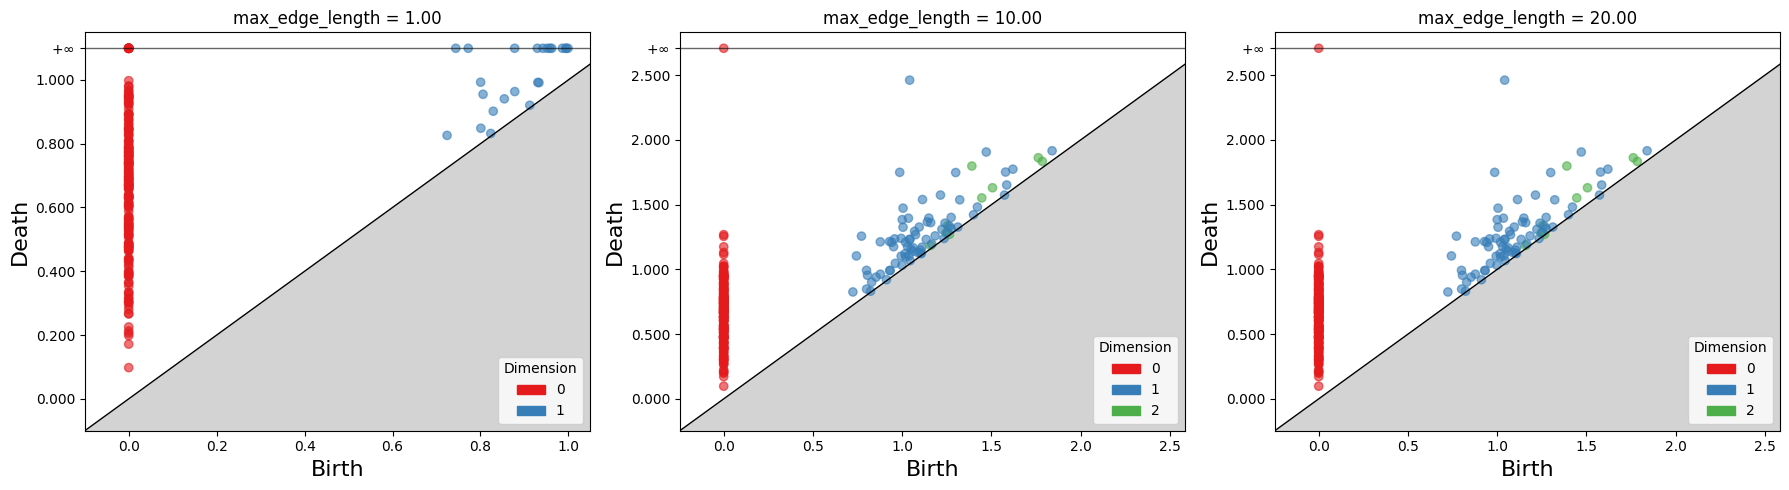

In [5]:
max_edges = [1, np.ceil(diameter),20]  # Tres valores distintos (el último es el diámetro)
diagrams = []

for i, max_edge in enumerate(max_edges):
    rips_complex = gd.RipsComplex(points=toro, max_edge_length=max_edge)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=3)
    diag = simplex_tree.persistence()
    diagrams.append((max_edge, diag))

# Paso 4: Graficar los diagramas de persistencia
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, (max_edge, diag) in zip(axes, diagrams):
    gd.plot_persistence_diagram(diag, axes=ax)
    ax.set_title(f"max_edge_length = {max_edge:.2f}")

plt.tight_layout()
plt.show()

--------------------BARCODES--------------------


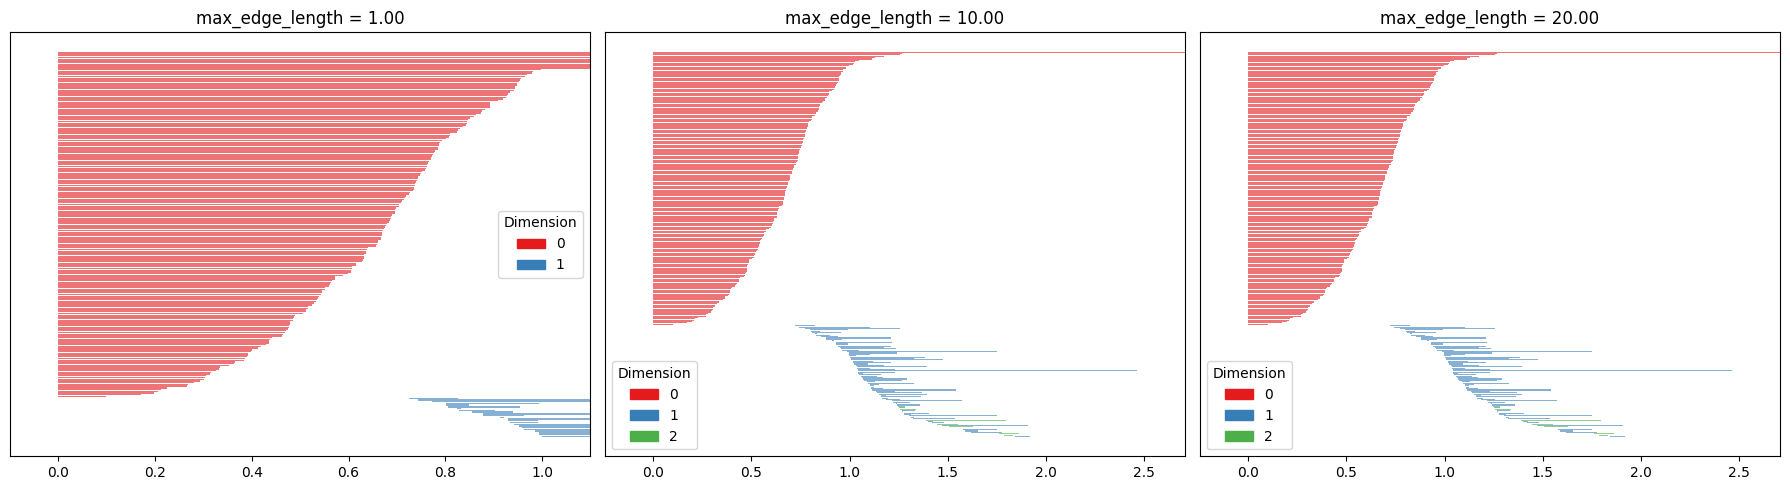

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

print('--------------------BARCODES--------------------')
for ax, (max_edge, diag) in zip(axes, diagrams):
    gd.plot_persistence_barcode(diag, axes=ax)
    ax.set_title(f"max_edge_length = {max_edge:.2f}")

plt.tight_layout()
plt.show()

--------------------DENSITY PLOTS--------------------


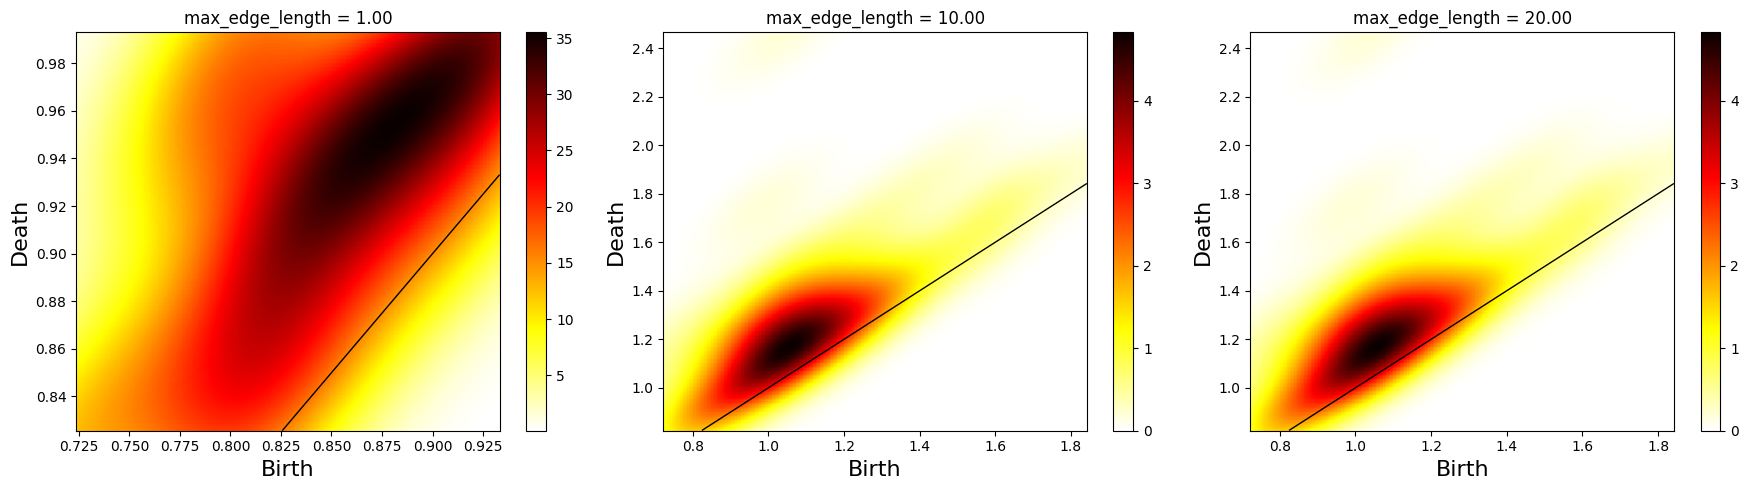

In [10]:
print('--------------------DENSITY PLOTS d1--------------------')
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, (max_edge, diag) in zip(axes, diagrams):
    gd.plot_persistence_density(diag, legend=True, max_intervals=1000,dimension=1, axes=ax)
    ax.set_title(f"max_edge_length = {max_edge:.2f}")

plt.tight_layout()
plt.show()

--------------------DENSITY PLOTS--------------------


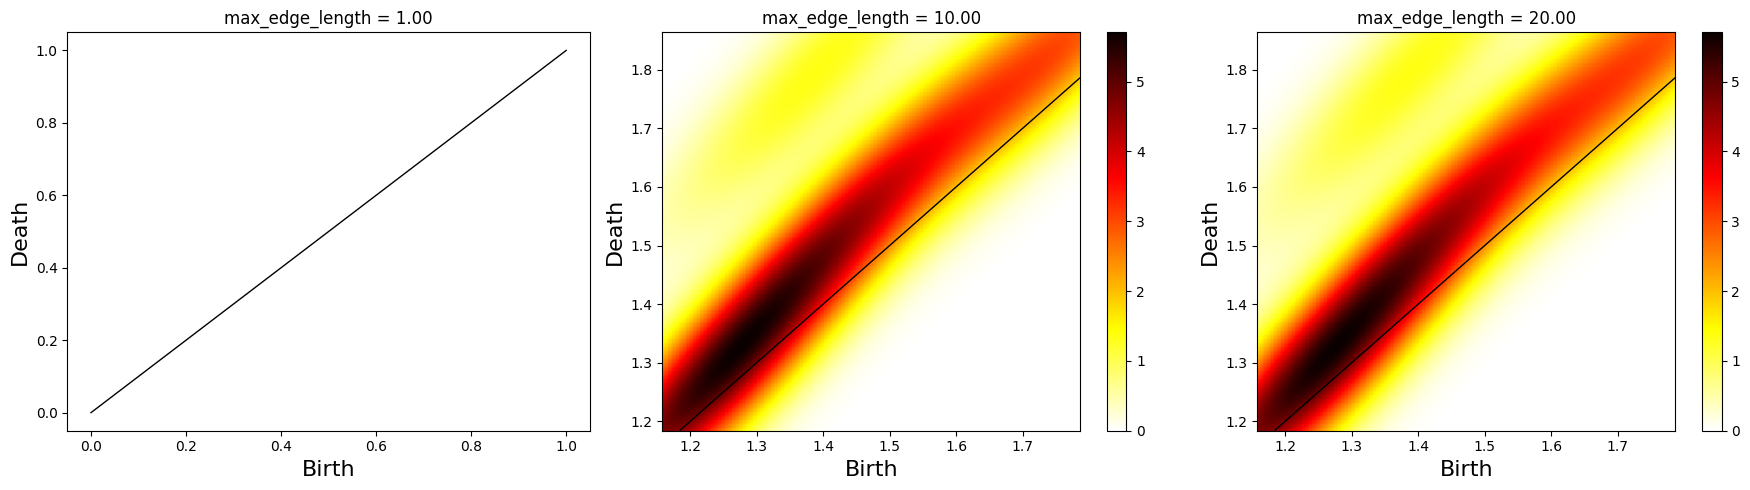

In [11]:
print('--------------------DENSITY PLOTS d2--------------------')
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, (max_edge, diag) in zip(axes, diagrams):
    gd.plot_persistence_density(diag, legend=True, max_intervals=1000,dimension=2, axes=ax)
    ax.set_title(f"max_edge_length = {max_edge:.2f}")

plt.tight_layout()
plt.show()

Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


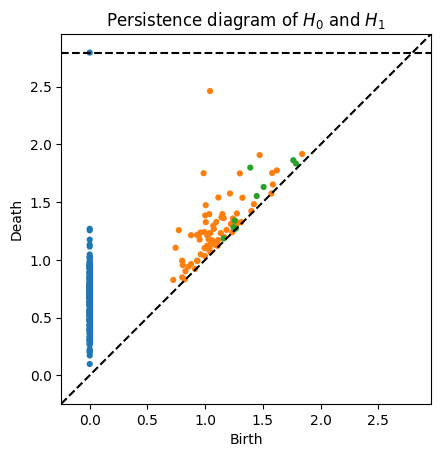

In [38]:
rips = Rips(maxdim=2)
dgms = rips.fit_transform(toro)
H0_dgm = dgms[0]
H1_dgm = dgms[1]
H2_dgm = dgms[2]


rips.plot(dgms, legend=False, show=False)
plt.title("Persistence diagram of $H_0$ and $H_1$")
plt.show()

-----------IMAGEN DE PERSISTENCIA D1-----------


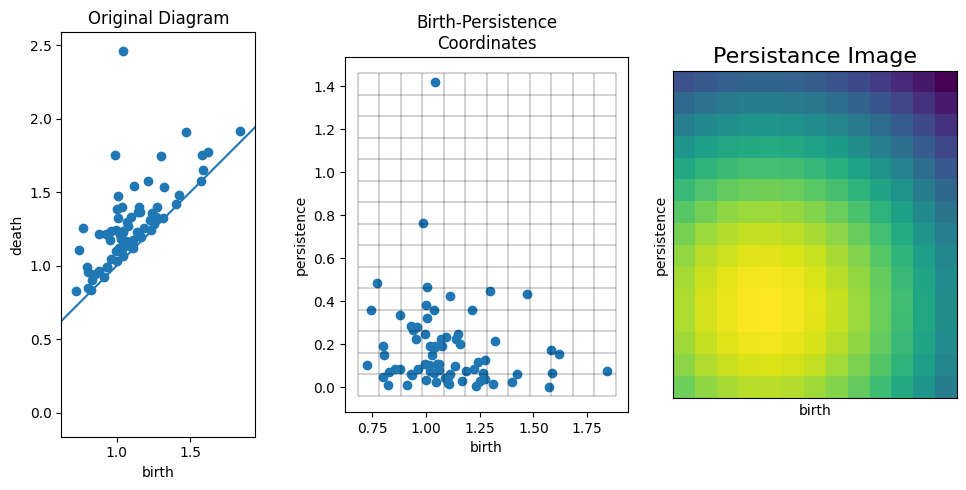

In [44]:
print("-----------IMAGEN DE PERSISTENCIA D1-----------")
pimgr = PersistenceImager(pixel_size=0.1)
pimgr.fit(H1_dgm)

fig, axs = plt.subplots(1, 3, figsize=(10,5))

axs[0].set_title("Original Diagram")
pimgr.plot_diagram(H1_dgm, skew=False, ax=axs[0])

axs[1].set_title("Birth-Persistence\nCoordinates")
pimgr.plot_diagram(H1_dgm, skew=True, ax=axs[1])

pimgr.pixel_size = 0.1
pimgr.plot_image(pimgr.transform(H1_dgm), ax=axs[2])
axs[2].set_title('Persistance Image', fontsize=16)

plt.tight_layout()

-----------IMAGEN DE PERSISTENCIA D2-----------


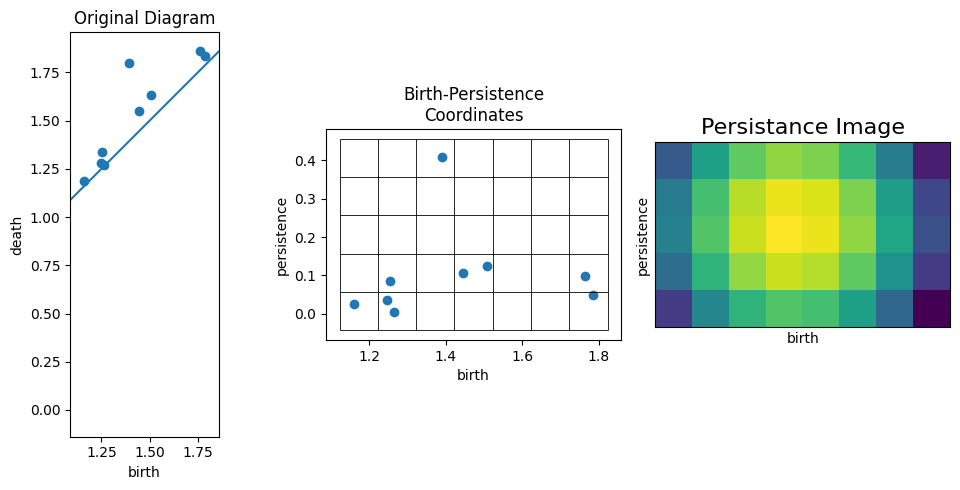

In [45]:
print("-----------IMAGEN DE PERSISTENCIA D2-----------")
pimgr = PersistenceImager(pixel_size=0.1)
pimgr.fit(H2_dgm)

fig, axs = plt.subplots(1, 3, figsize=(10,5))

axs[0].set_title("Original Diagram")
pimgr.plot_diagram(H2_dgm, skew=False, ax=axs[0])

axs[1].set_title("Birth-Persistence\nCoordinates")
pimgr.plot_diagram(H2_dgm, skew=True, ax=axs[1])

pimgr.pixel_size = 0.1
pimgr.plot_image(pimgr.transform(H2_dgm), ax=axs[2])
axs[2].set_title('Persistance Image', fontsize=16)

plt.tight_layout()

#### 2. d-Esfera

<Axes3D: >

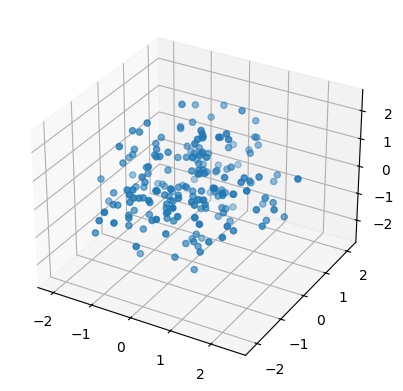

In [46]:
dsphere = tadasets.dsphere(n=200, d=12, r=3.14, ambient=14, noise=0.14)
tadasets.plot3d(dsphere)

In [47]:
pairwise_dist = pdist(dsphere)
diameter = np.max(pairwise_dist)
print(f"Diámetro del conjunto: {diameter:.4f}")

Diámetro del conjunto: 6.6111


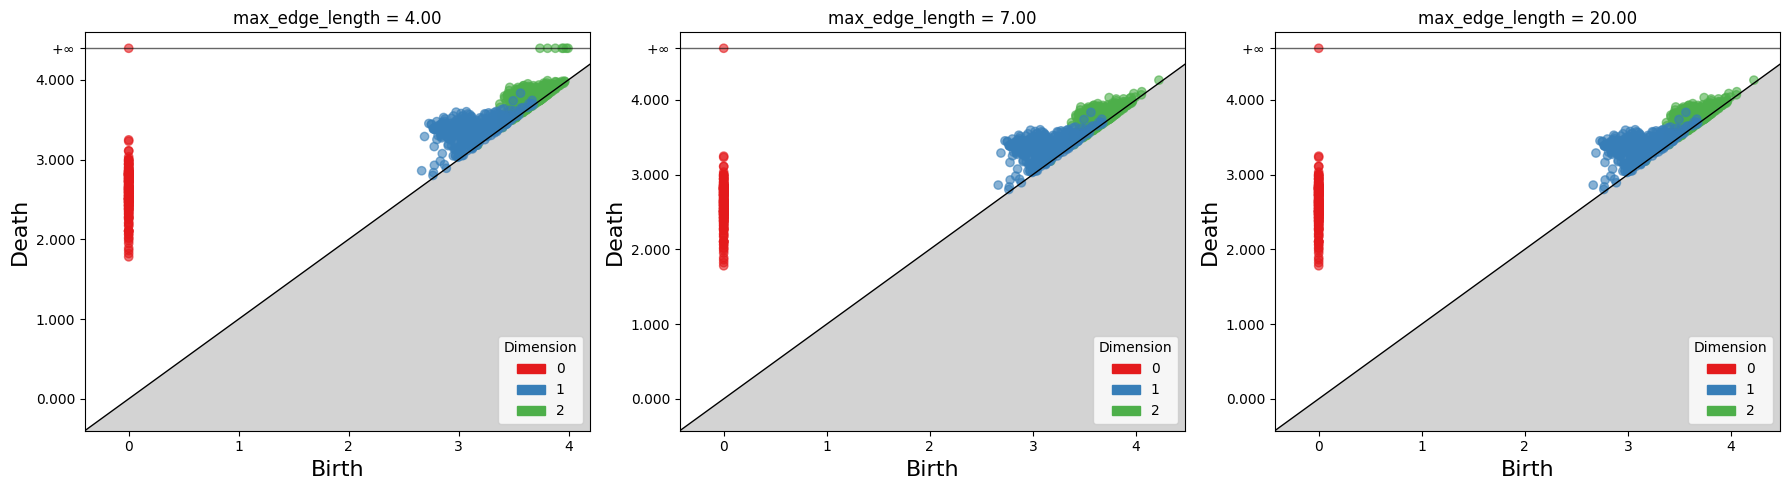

In [48]:
max_edges = [4, np.ceil(diameter),20]  # Tres valores distintos (el último es el diámetro)
diagrams = []

for i, max_edge in enumerate(max_edges):
    rips_complex = gd.RipsComplex(points=dsphere, max_edge_length=max_edge)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=3)
    diag = simplex_tree.persistence()
    diagrams.append((max_edge, diag))

# Paso 4: Graficar los diagramas de persistencia
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, (max_edge, diag) in zip(axes, diagrams):
    gd.plot_persistence_diagram(diag, axes=ax)
    ax.set_title(f"max_edge_length = {max_edge:.2f}")

plt.tight_layout()
plt.show()

--------------------BARCODES--------------------


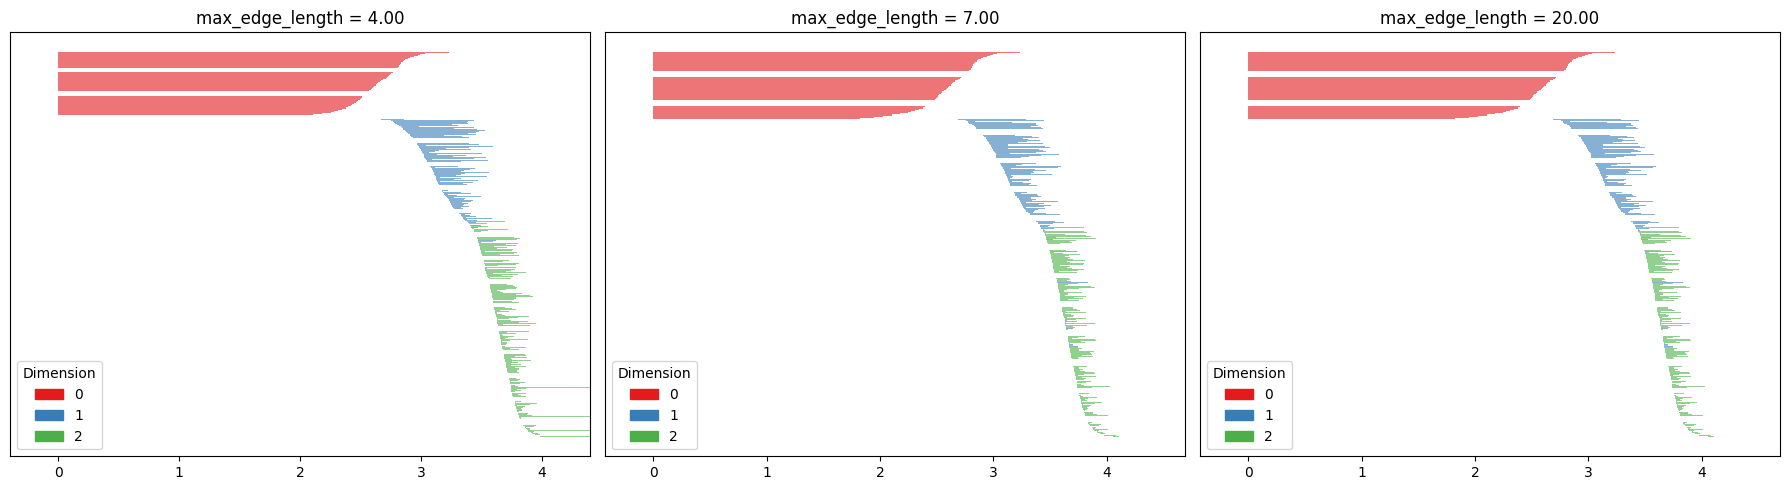

In [50]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

print('--------------------BARCODES--------------------')
for ax, (max_edge, diag) in zip(axes, diagrams):
    gd.plot_persistence_barcode(diag, axes=ax)
    ax.set_title(f"max_edge_length = {max_edge:.2f}")

plt.tight_layout()
plt.show()

--------------------DENSITY PLOTS d1--------------------


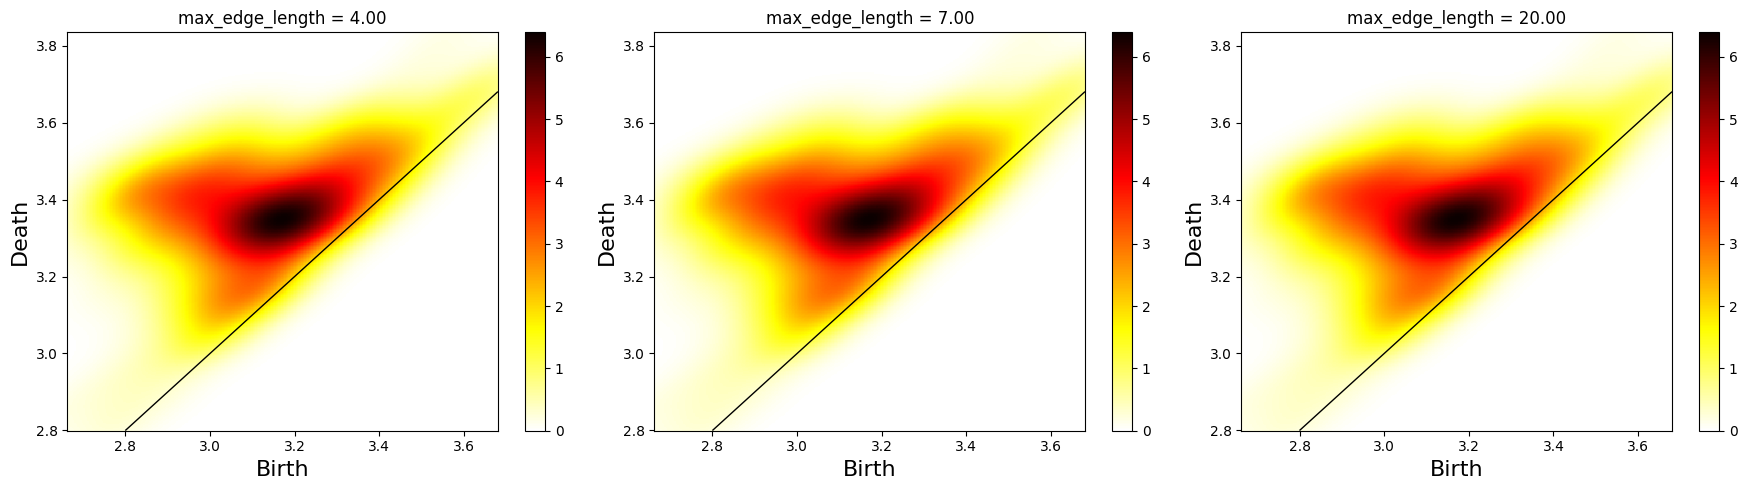

In [51]:
print('--------------------DENSITY PLOTS d1--------------------')
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, (max_edge, diag) in zip(axes, diagrams):
    gd.plot_persistence_density(diag, legend=True, max_intervals=1000,dimension=1, axes=ax)
    ax.set_title(f"max_edge_length = {max_edge:.2f}")

plt.tight_layout()
plt.show()

--------------------DENSITY PLOTS d2--------------------


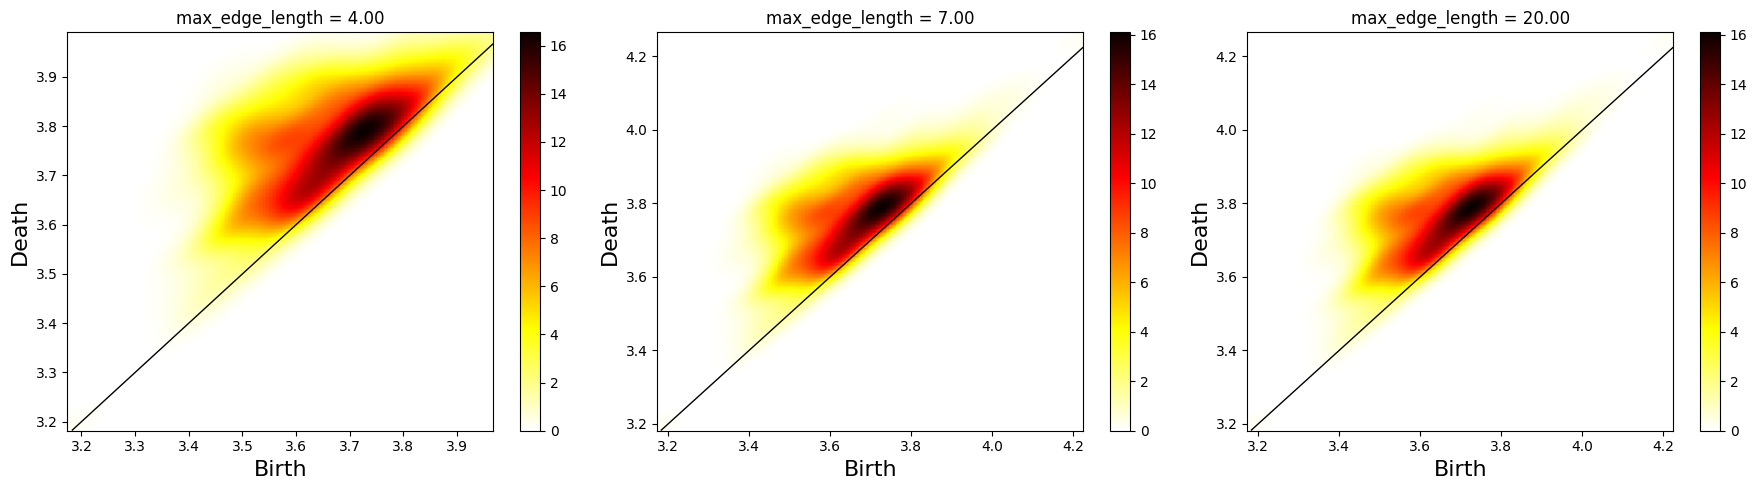

In [52]:
print('--------------------DENSITY PLOTS d2--------------------')
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, (max_edge, diag) in zip(axes, diagrams):
    gd.plot_persistence_density(diag, legend=True, max_intervals=1000,dimension=2, axes=ax)
    ax.set_title(f"max_edge_length = {max_edge:.2f}")

plt.tight_layout()
plt.show()

Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


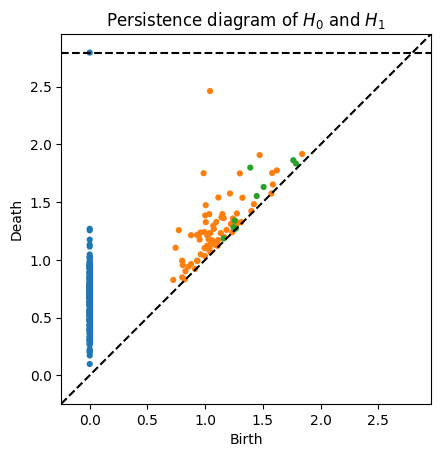

In [53]:
rips = Rips(maxdim=2)
dgms = rips.fit_transform(toro)
H0_dgm = dgms[0]
H1_dgm = dgms[1]
H2_dgm = dgms[2]


rips.plot(dgms, legend=False, show=False)
plt.title("Persistence diagram of $H_0$ and $H_1$")
plt.show()

-----------IMAGEN DE PERSISTENCIA D1-----------


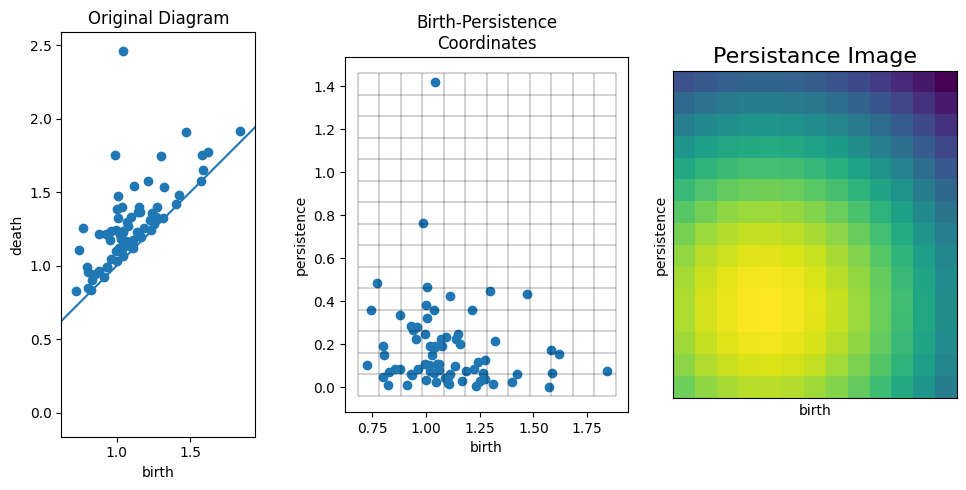

In [54]:
print("-----------IMAGEN DE PERSISTENCIA D1-----------")
pimgr = PersistenceImager(pixel_size=0.1)
pimgr.fit(H1_dgm)

fig, axs = plt.subplots(1, 3, figsize=(10,5))

axs[0].set_title("Original Diagram")
pimgr.plot_diagram(H1_dgm, skew=False, ax=axs[0])

axs[1].set_title("Birth-Persistence\nCoordinates")
pimgr.plot_diagram(H1_dgm, skew=True, ax=axs[1])

pimgr.pixel_size = 0.1
pimgr.plot_image(pimgr.transform(H1_dgm), ax=axs[2])
axs[2].set_title('Persistance Image', fontsize=16)

plt.tight_layout()

-----------IMAGEN DE PERSISTENCIA D2-----------


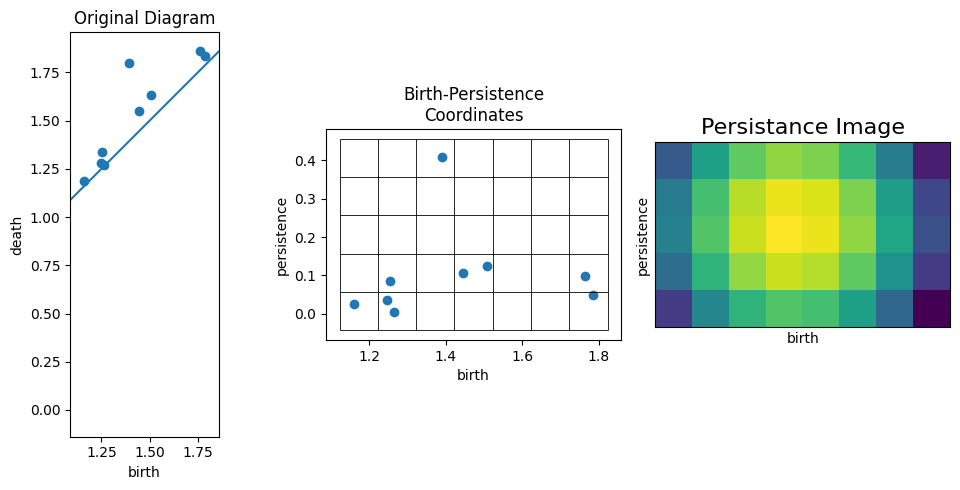

In [55]:
print("-----------IMAGEN DE PERSISTENCIA D2-----------")
pimgr = PersistenceImager(pixel_size=0.1)
pimgr.fit(H2_dgm)

fig, axs = plt.subplots(1, 3, figsize=(10,5))

axs[0].set_title("Original Diagram")
pimgr.plot_diagram(H2_dgm, skew=False, ax=axs[0])

axs[1].set_title("Birth-Persistence\nCoordinates")
pimgr.plot_diagram(H2_dgm, skew=True, ax=axs[1])

pimgr.pixel_size = 0.1
pimgr.plot_image(pimgr.transform(H2_dgm), ax=axs[2])
axs[2].set_title('Persistance Image', fontsize=16)

plt.tight_layout()

El diametro del conjunto es 6.5144, por lo tanto, podemos acotar el parámetro de Rips a 7 y con esto garantizamos que el último complejo simplicial será el que conecta a todos.

#### 3. Esfera

<Axes3D: >

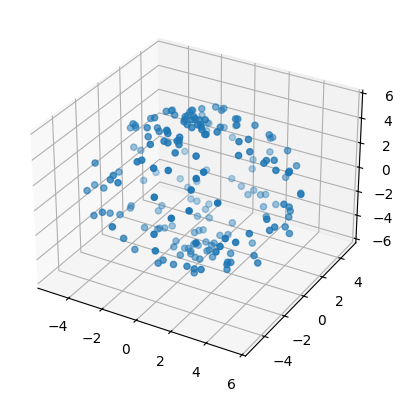

In [56]:
sphere = tadasets.sphere(n= 200, r= 5, noise= 0.24, seed=42)
tadasets.plot3d(sphere)

In [57]:
pairwise_dist = pdist(sphere)
diameter = np.max(pairwise_dist)
print(f"Diámetro del conjunto: {diameter:.4f}")

Diámetro del conjunto: 11.0116


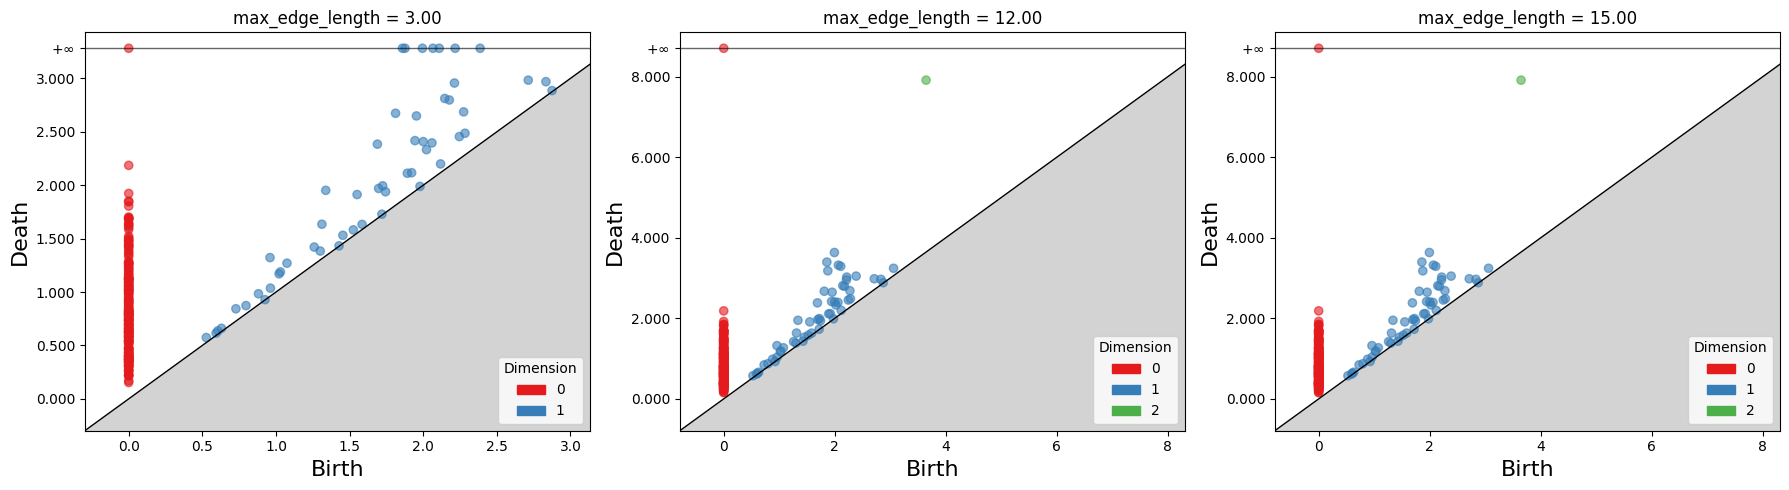

In [58]:
max_edges = [3, np.ceil(diameter),15]  # Tres valores distintos (el último es el diámetro)
diagrams = []

for i, max_edge in enumerate(max_edges):
    rips_complex = gd.RipsComplex(points=sphere, max_edge_length=max_edge)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=3)
    diag = simplex_tree.persistence()
    diagrams.append((max_edge, diag))

# Paso 4: Graficar los diagramas de persistencia
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, (max_edge, diag) in zip(axes, diagrams):
    gd.plot_persistence_diagram(diag, axes=ax)
    ax.set_title(f"max_edge_length = {max_edge:.2f}")

plt.tight_layout()
plt.show()

--------------------BARCODES--------------------


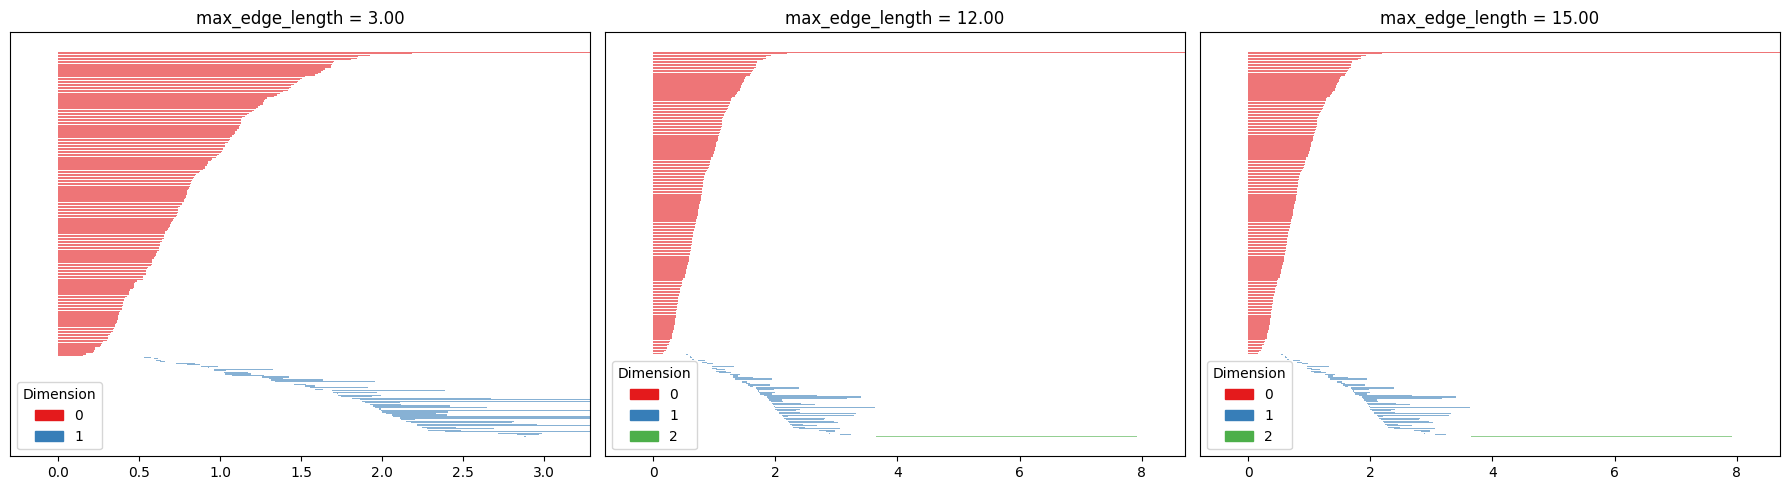

In [59]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

print('--------------------BARCODES--------------------')
for ax, (max_edge, diag) in zip(axes, diagrams):
    gd.plot_persistence_barcode(diag, axes=ax)
    ax.set_title(f"max_edge_length = {max_edge:.2f}")

plt.tight_layout()
plt.show()

--------------------DENSITY PLOTS d1--------------------


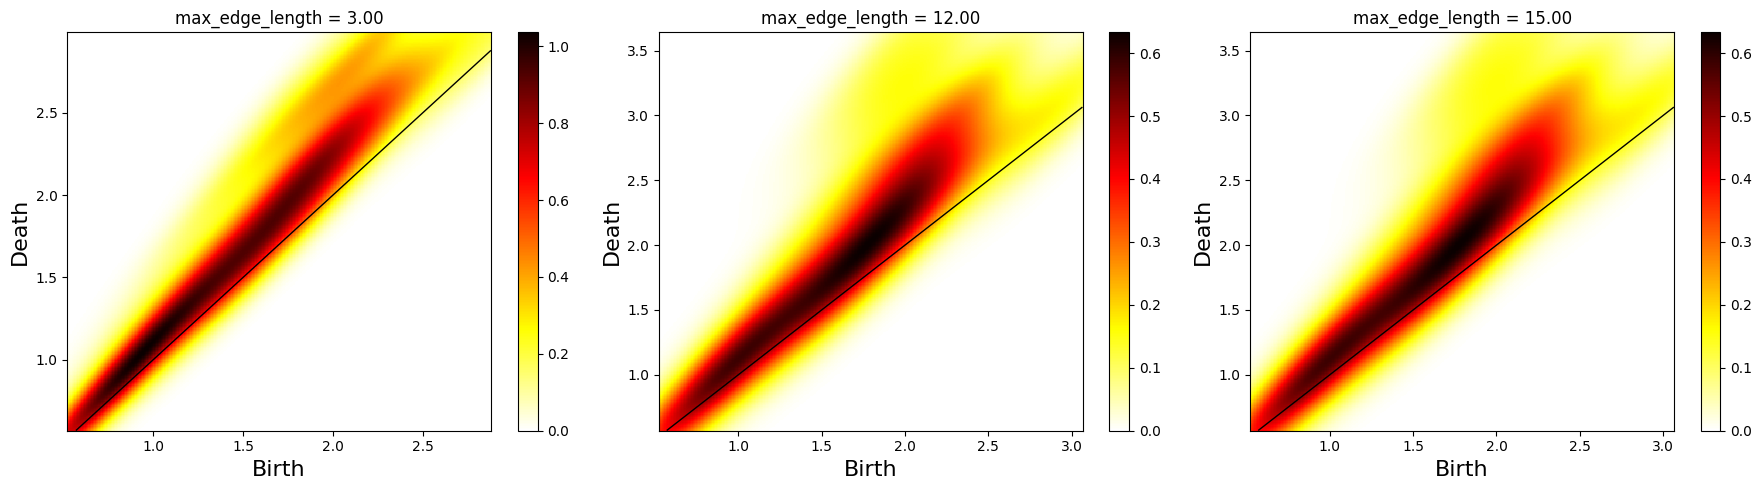

In [61]:
print('--------------------DENSITY PLOTS d1--------------------')
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, (max_edge, diag) in zip(axes, diagrams):
    gd.plot_persistence_density(diag, legend=True, max_intervals=1000,dimension=1, axes=ax)
    ax.set_title(f"max_edge_length = {max_edge:.2f}")

plt.tight_layout()
plt.show()

--------------------DENSITY PLOTS d2--------------------


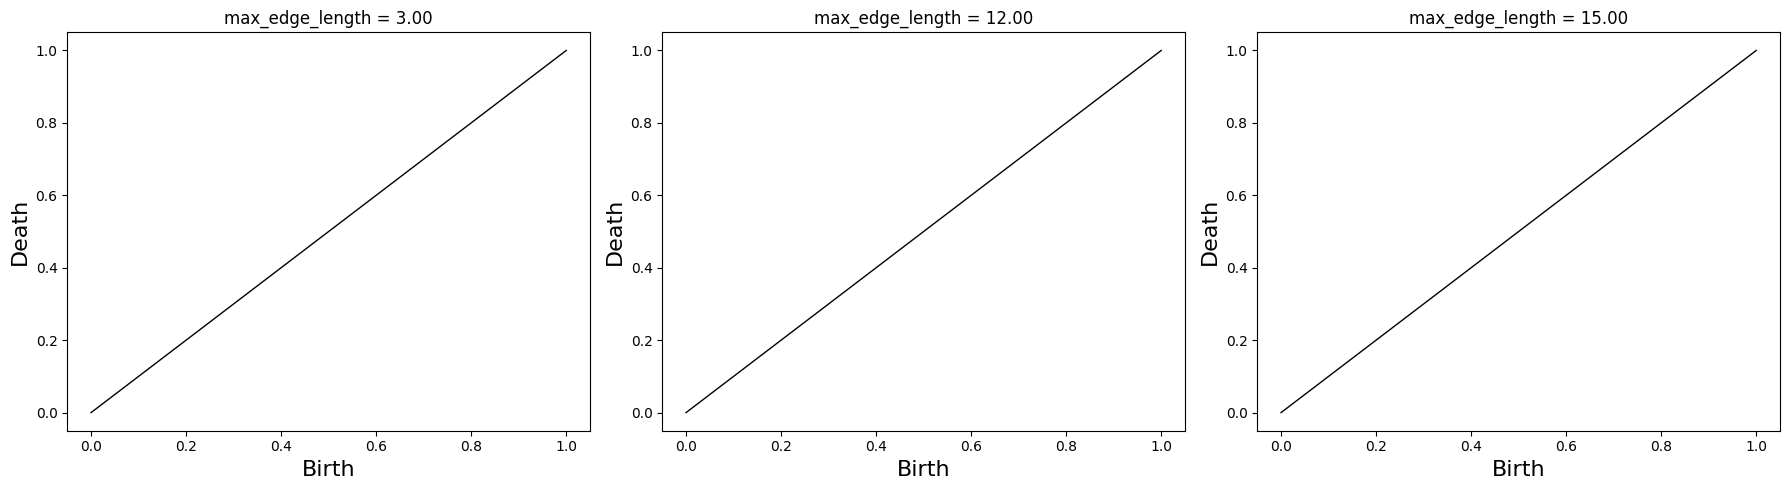

In [62]:
print('--------------------DENSITY PLOTS d2--------------------')
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, (max_edge, diag) in zip(axes, diagrams):
    gd.plot_persistence_density(diag, legend=True, max_intervals=1000,dimension=2, axes=ax)
    ax.set_title(f"max_edge_length = {max_edge:.2f}")

plt.tight_layout()
plt.show()

Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


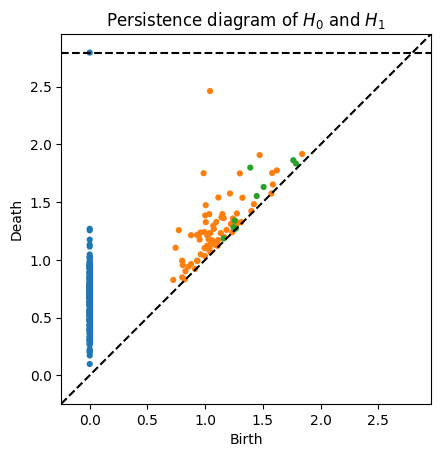

In [63]:
rips = Rips(maxdim=2)
dgms = rips.fit_transform(toro)
H0_dgm = dgms[0]
H1_dgm = dgms[1]
H2_dgm = dgms[2]


rips.plot(dgms, legend=False, show=False)
plt.title("Persistence diagram of $H_0$ and $H_1$")
plt.show()

-----------IMAGEN DE PERSISTENCIA D1-----------


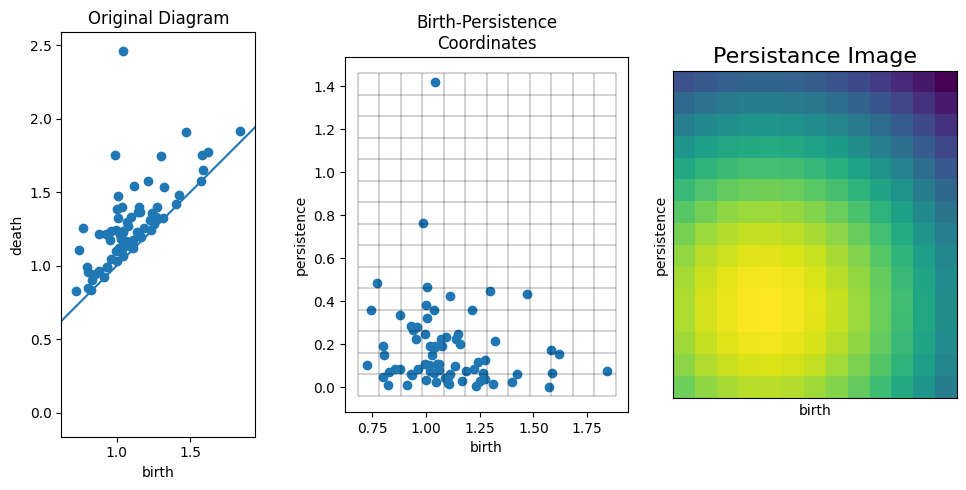

In [64]:
print("-----------IMAGEN DE PERSISTENCIA D1-----------")
pimgr = PersistenceImager(pixel_size=0.1)
pimgr.fit(H1_dgm)

fig, axs = plt.subplots(1, 3, figsize=(10,5))

axs[0].set_title("Original Diagram")
pimgr.plot_diagram(H1_dgm, skew=False, ax=axs[0])

axs[1].set_title("Birth-Persistence\nCoordinates")
pimgr.plot_diagram(H1_dgm, skew=True, ax=axs[1])

pimgr.pixel_size = 0.1
pimgr.plot_image(pimgr.transform(H1_dgm), ax=axs[2])
axs[2].set_title('Persistance Image', fontsize=16)

plt.tight_layout()

-----------IMAGEN DE PERSISTENCIA D2-----------


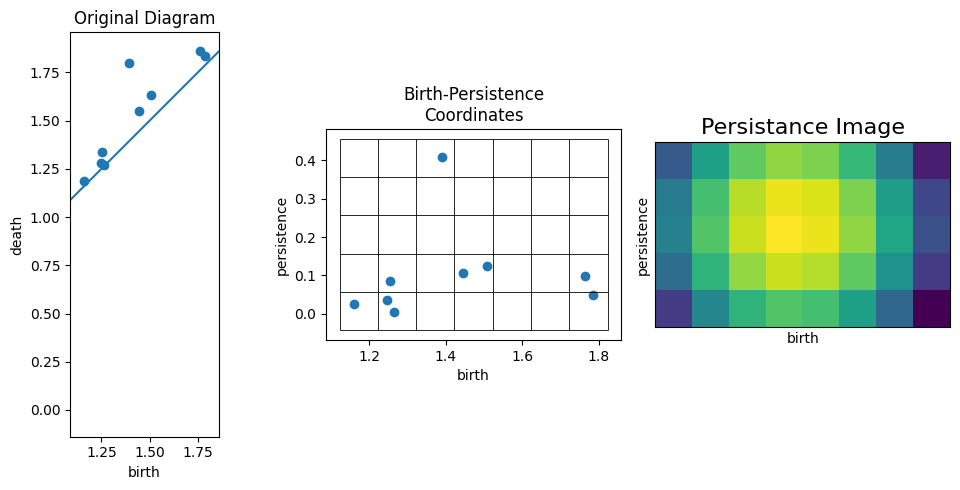

In [65]:
print("-----------IMAGEN DE PERSISTENCIA D2-----------")
pimgr = PersistenceImager(pixel_size=0.1)
pimgr.fit(H2_dgm)

fig, axs = plt.subplots(1, 3, figsize=(10,5))

axs[0].set_title("Original Diagram")
pimgr.plot_diagram(H2_dgm, skew=False, ax=axs[0])

axs[1].set_title("Birth-Persistence\nCoordinates")
pimgr.plot_diagram(H2_dgm, skew=True, ax=axs[1])

pimgr.pixel_size = 0.1
pimgr.plot_image(pimgr.transform(H2_dgm), ax=axs[2])
axs[2].set_title('Persistance Image', fontsize=16)

plt.tight_layout()

#### 4. Símbolo de infinito

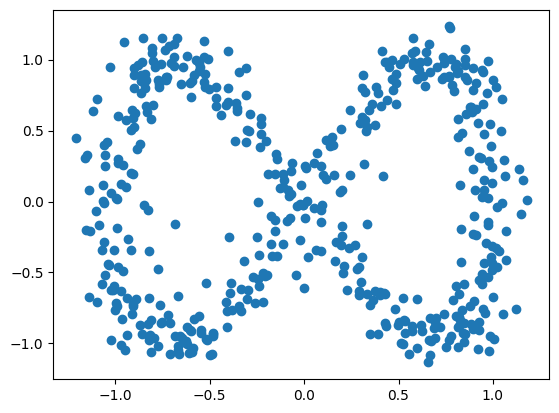

In [66]:
infty_sign = tadasets.infty_sign(n=500, noise=0.1, seed=42)
plt.scatter(infty_sign[:,0], infty_sign[:,1])
plt.show()

In [67]:
pairwise_dist = pdist(infty_sign)
diameter = np.max(pairwise_dist)
print(f"Diámetro del conjunto: {diameter:.4f}")

Diámetro del conjunto: 2.9154


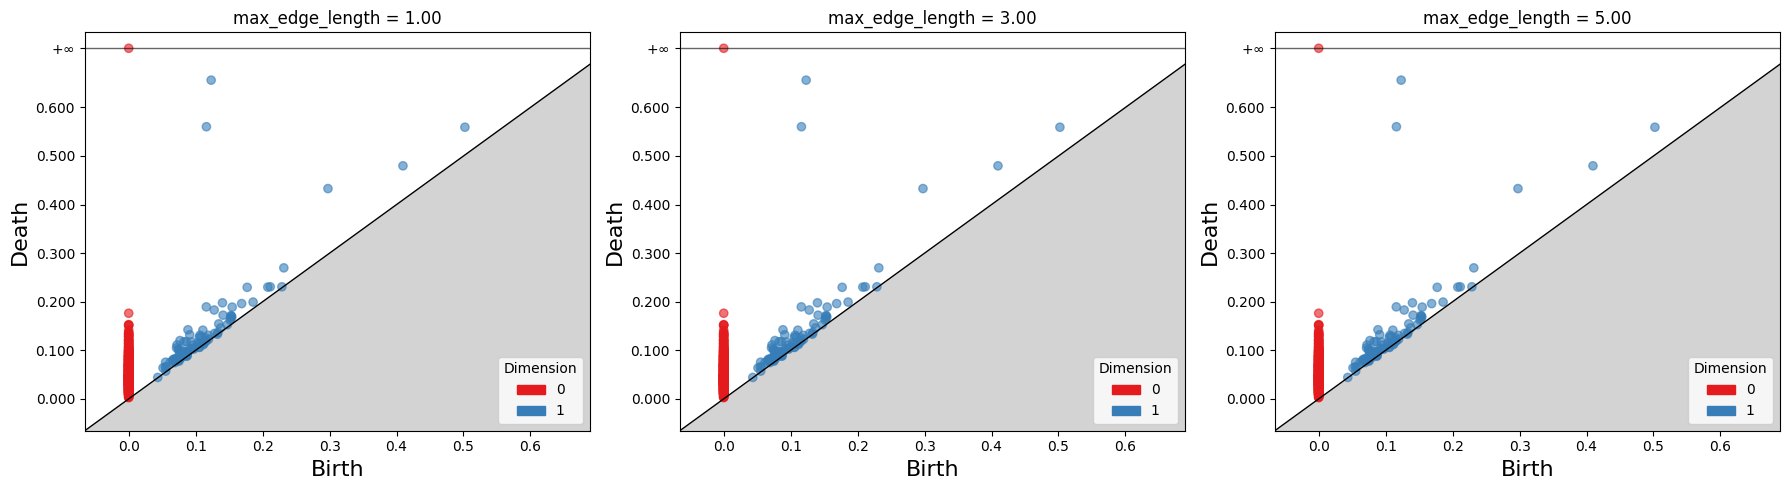

In [68]:
max_edges = [1, np.ceil(diameter),5]  # Tres valores distintos (el último es el diámetro)
diagrams = []

for i, max_edge in enumerate(max_edges):
    rips_complex = gd.RipsComplex(points=infty_sign, max_edge_length=max_edge)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
    diag = simplex_tree.persistence()
    diagrams.append((max_edge, diag))

# Paso 4: Graficar los diagramas de persistencia
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, (max_edge, diag) in zip(axes, diagrams):
    gd.plot_persistence_diagram(diag, axes=ax)
    ax.set_title(f"max_edge_length = {max_edge:.2f}")

plt.tight_layout()
plt.show()

--------------------BARCODES--------------------


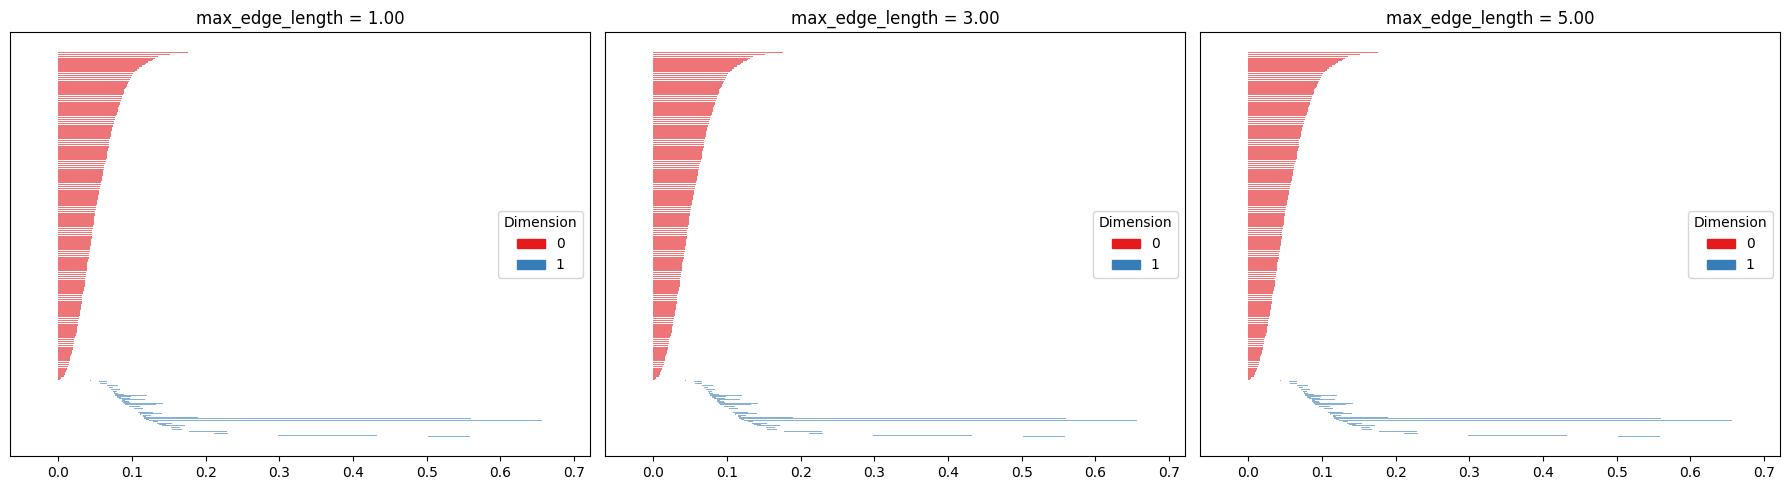

In [69]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

print('--------------------BARCODES--------------------')
for ax, (max_edge, diag) in zip(axes, diagrams):
    gd.plot_persistence_barcode(diag, axes=ax)
    ax.set_title(f"max_edge_length = {max_edge:.2f}")

plt.tight_layout()
plt.show()

--------------------DENSITY PLOTS d1--------------------


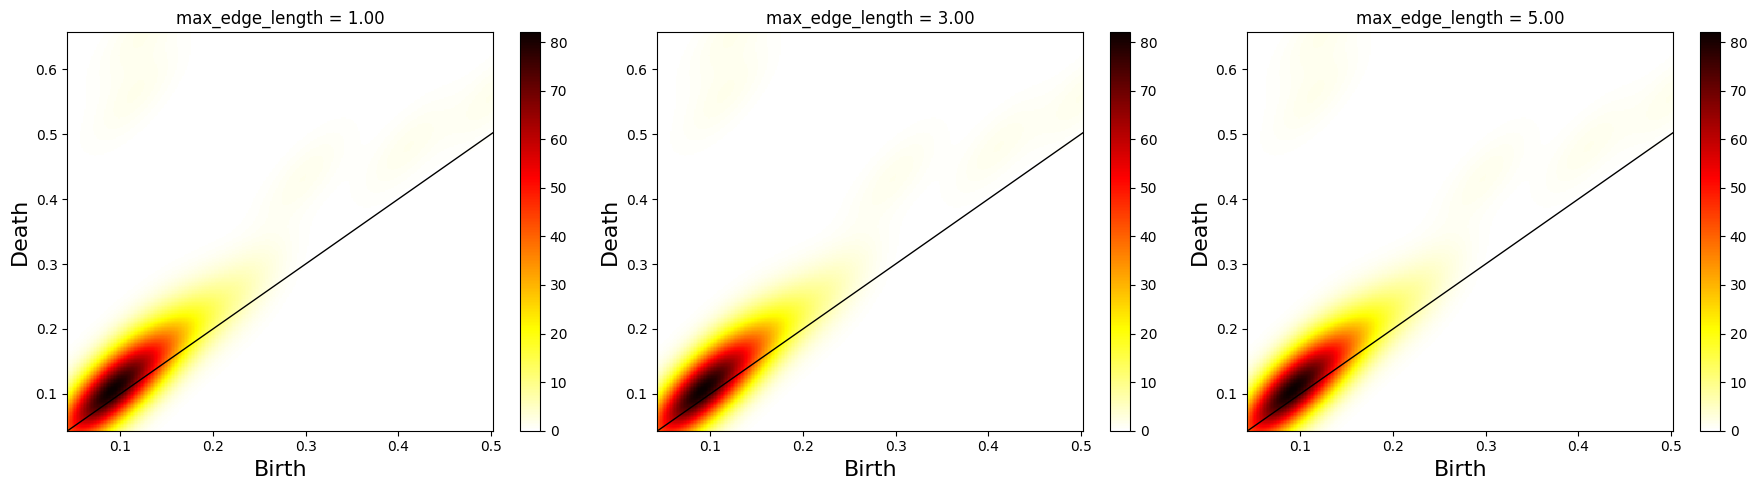

In [70]:
print('--------------------DENSITY PLOTS d1--------------------')
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, (max_edge, diag) in zip(axes, diagrams):
    gd.plot_persistence_density(diag, legend=True, max_intervals=1000,dimension=1, axes=ax)
    ax.set_title(f"max_edge_length = {max_edge:.2f}")

plt.tight_layout()
plt.show()

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


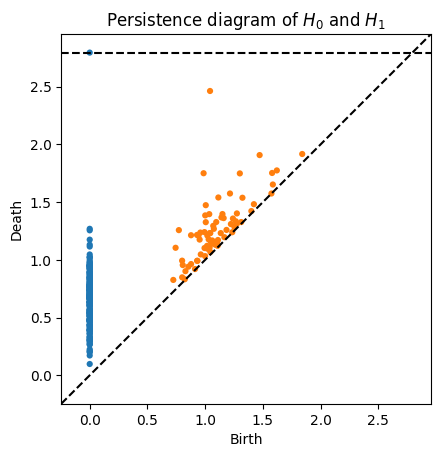

In [72]:
rips = Rips(maxdim=1)
dgms = rips.fit_transform(toro)
H0_dgm = dgms[0]
H1_dgm = dgms[1]


rips.plot(dgms, legend=False, show=False)
plt.title("Persistence diagram of $H_0$ and $H_1$")
plt.show()

-----------IMAGEN DE PERSISTENCIA D1-----------


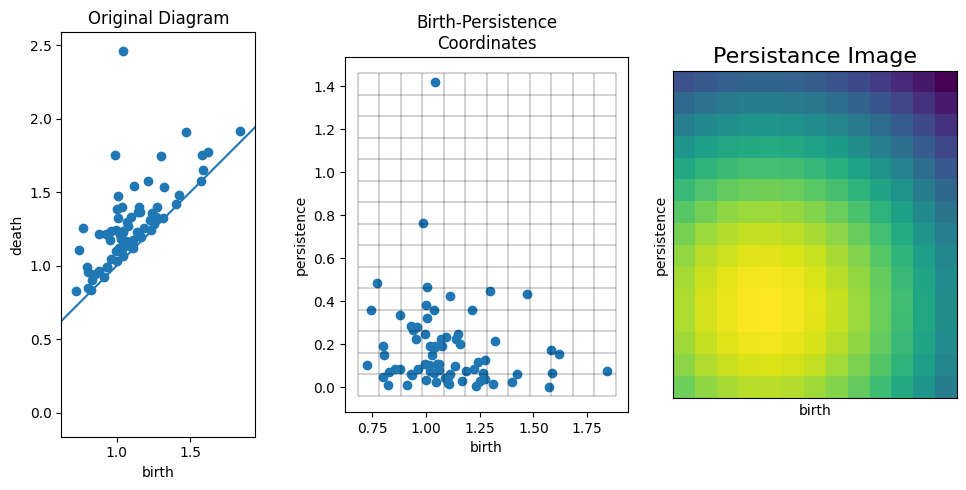

In [73]:
print("-----------IMAGEN DE PERSISTENCIA D1-----------")
pimgr = PersistenceImager(pixel_size=0.1)
pimgr.fit(H1_dgm)

fig, axs = plt.subplots(1, 3, figsize=(10,5))

axs[0].set_title("Original Diagram")
pimgr.plot_diagram(H1_dgm, skew=False, ax=axs[0])

axs[1].set_title("Birth-Persistence\nCoordinates")
pimgr.plot_diagram(H1_dgm, skew=True, ax=axs[1])

pimgr.pixel_size = 0.1
pimgr.plot_image(pimgr.transform(H1_dgm), ax=axs[2])
axs[2].set_title('Persistance Image', fontsize=16)

plt.tight_layout()

#### 5. Swiss Roll

<Axes3D: >

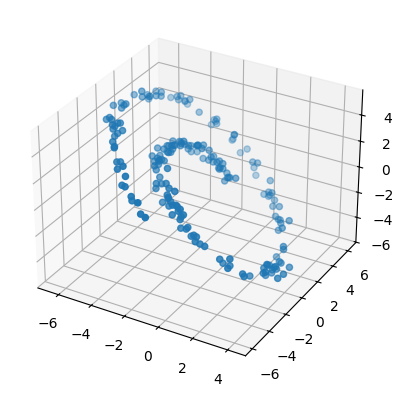

In [74]:
swiss_roll = tadasets.swiss_roll(n=200, r=4, ambient=10, noise=0.4, seed=42)
tadasets.plot3d(swiss_roll)

In [75]:
pairwise_dist = pdist(swiss_roll)
diameter = np.max(pairwise_dist)
print(f"Diámetro del conjunto: {diameter:.4f}")

Diámetro del conjunto: 25.5632


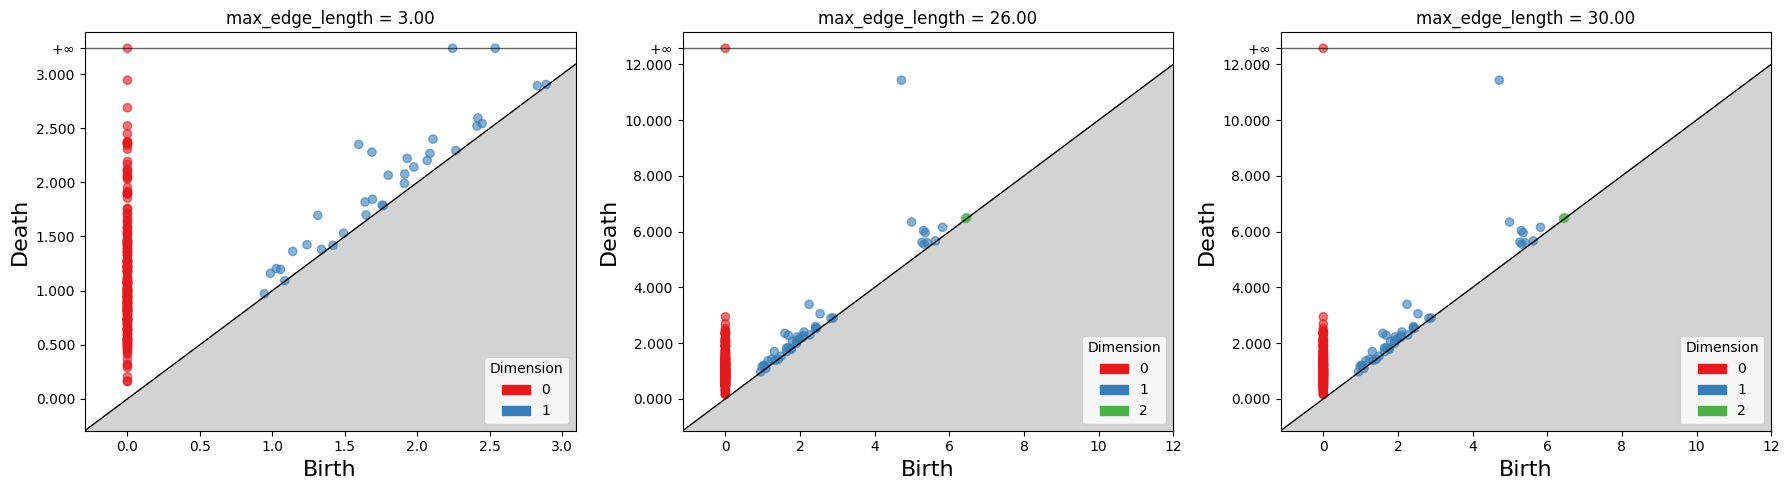

In [76]:
max_edges = [3, np.ceil(diameter),30]  # Tres valores distintos (el último es el diámetro)
diagrams = []

for i, max_edge in enumerate(max_edges):
    rips_complex = gd.RipsComplex(points=swiss_roll, max_edge_length=max_edge)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=3)
    diag = simplex_tree.persistence()
    diagrams.append((max_edge, diag))

# Paso 4: Graficar los diagramas de persistencia
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, (max_edge, diag) in zip(axes, diagrams):
    gd.plot_persistence_diagram(diag, axes=ax)
    ax.set_title(f"max_edge_length = {max_edge:.2f}")

plt.tight_layout()
plt.show()

--------------------BARCODES--------------------


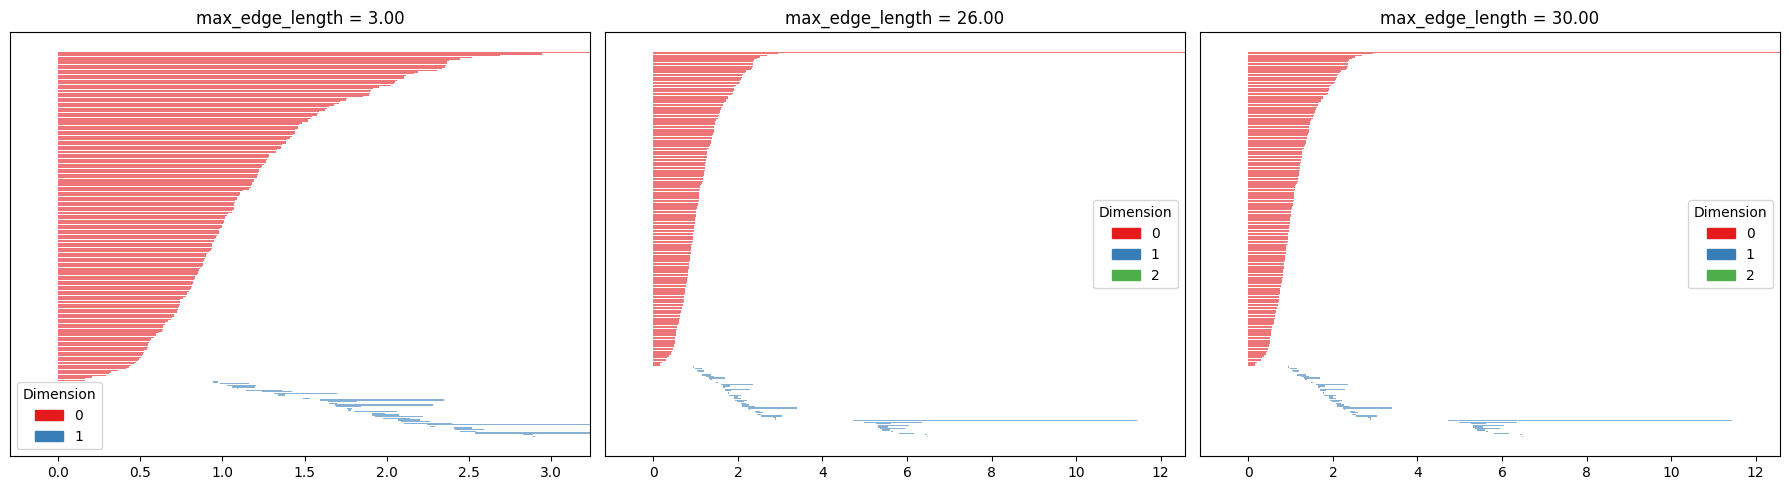

In [77]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

print('--------------------BARCODES--------------------')
for ax, (max_edge, diag) in zip(axes, diagrams):
    gd.plot_persistence_barcode(diag, axes=ax)
    ax.set_title(f"max_edge_length = {max_edge:.2f}")

plt.tight_layout()
plt.show()

--------------------DENSITY PLOTS d1--------------------


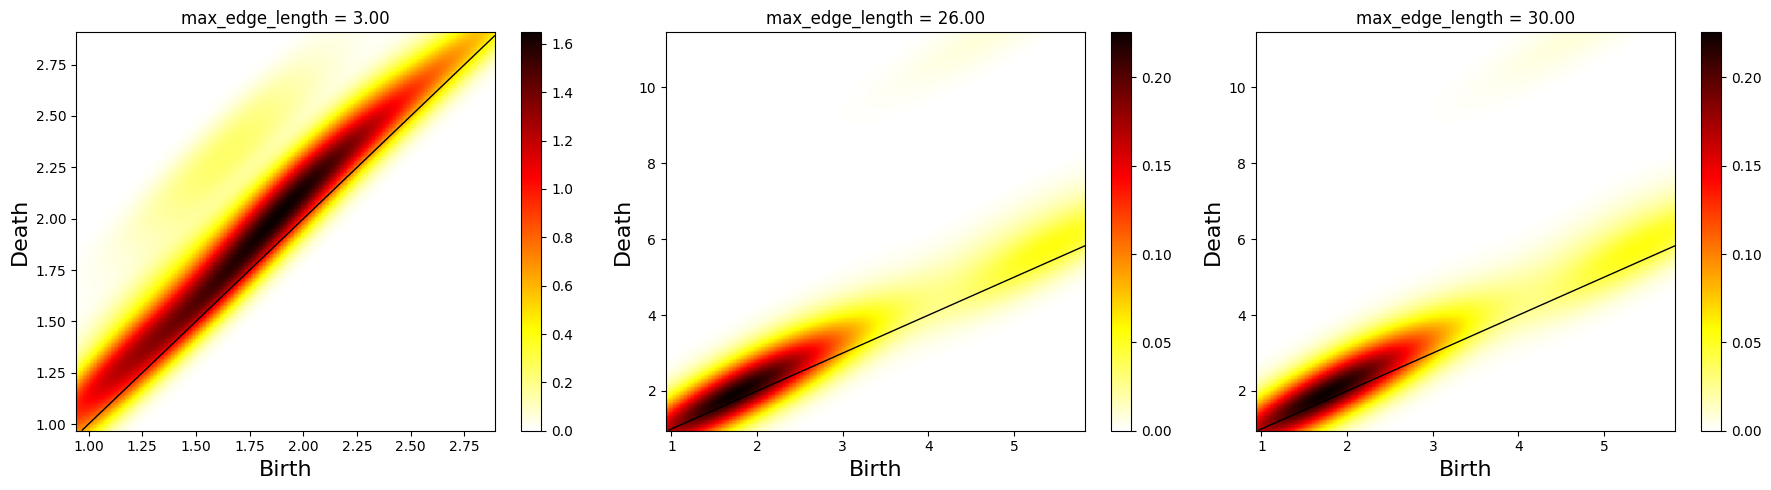

In [78]:
print('--------------------DENSITY PLOTS d1--------------------')
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, (max_edge, diag) in zip(axes, diagrams):
    gd.plot_persistence_density(diag, legend=True, max_intervals=1000,dimension=1, axes=ax)
    ax.set_title(f"max_edge_length = {max_edge:.2f}")

plt.tight_layout()
plt.show()

--------------------DENSITY PLOTS d2--------------------


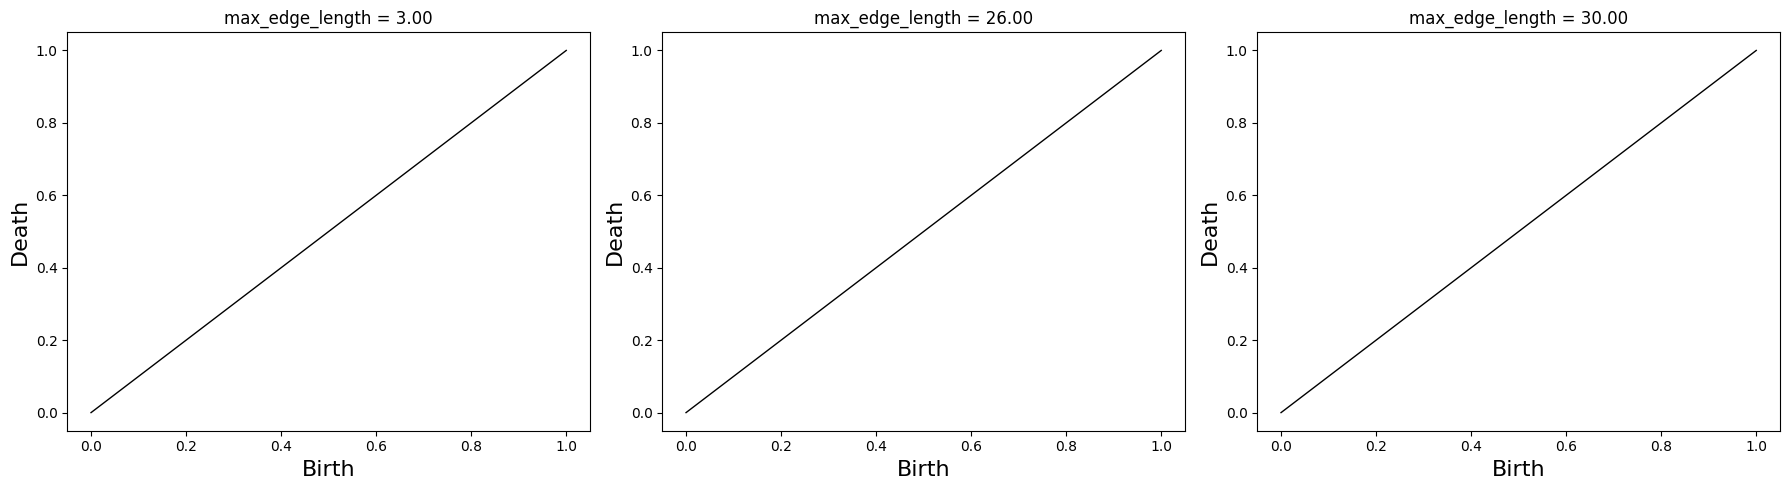

In [79]:
print('--------------------DENSITY PLOTS d2--------------------')
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, (max_edge, diag) in zip(axes, diagrams):
    gd.plot_persistence_density(diag, legend=True, max_intervals=1000,dimension=2, axes=ax)
    ax.set_title(f"max_edge_length = {max_edge:.2f}")

plt.tight_layout()
plt.show()

Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


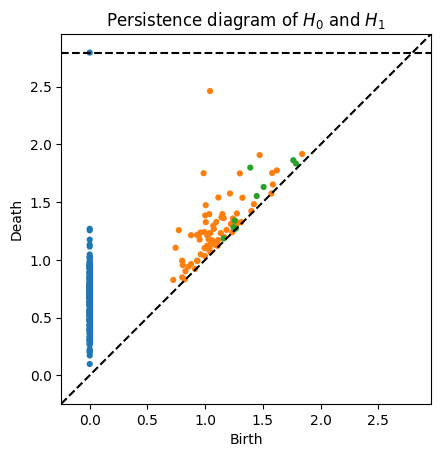

In [80]:
rips = Rips(maxdim=2)
dgms = rips.fit_transform(toro)
H0_dgm = dgms[0]
H1_dgm = dgms[1]
H2_dgm = dgms[2]


rips.plot(dgms, legend=False, show=False)
plt.title("Persistence diagram of $H_0$ and $H_1$")
plt.show()

-----------IMAGEN DE PERSISTENCIA D1-----------


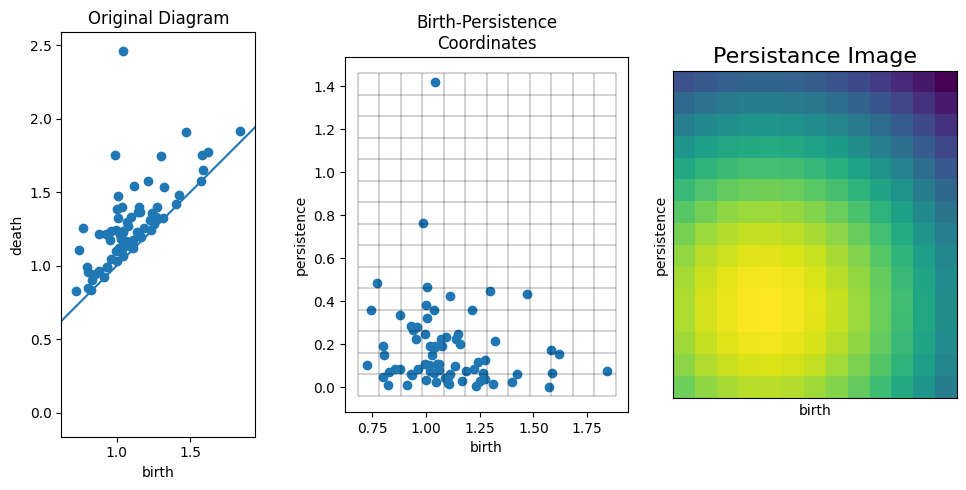

In [81]:
print("-----------IMAGEN DE PERSISTENCIA D1-----------")
pimgr = PersistenceImager(pixel_size=0.1)
pimgr.fit(H1_dgm)

fig, axs = plt.subplots(1, 3, figsize=(10,5))

axs[0].set_title("Original Diagram")
pimgr.plot_diagram(H1_dgm, skew=False, ax=axs[0])

axs[1].set_title("Birth-Persistence\nCoordinates")
pimgr.plot_diagram(H1_dgm, skew=True, ax=axs[1])

pimgr.pixel_size = 0.1
pimgr.plot_image(pimgr.transform(H1_dgm), ax=axs[2])
axs[2].set_title('Persistance Image', fontsize=16)

plt.tight_layout()

-----------IMAGEN DE PERSISTENCIA D2-----------


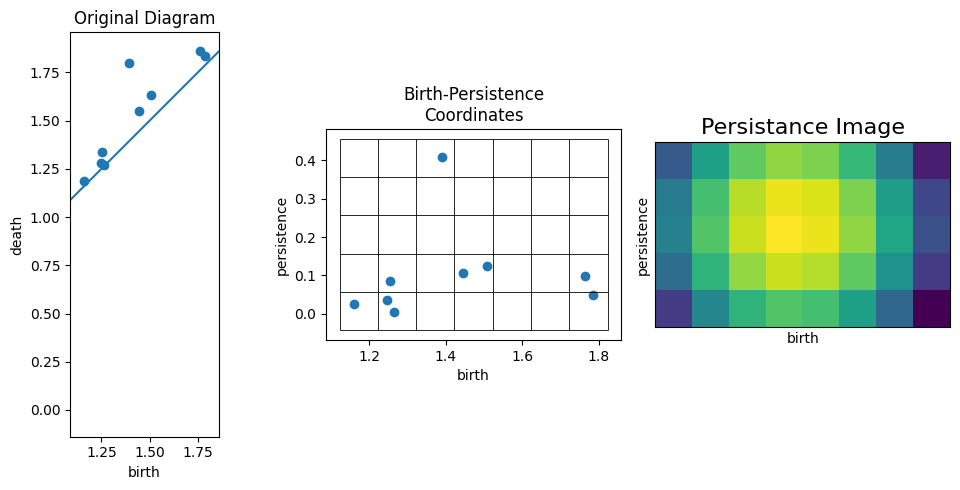

In [82]:
print("-----------IMAGEN DE PERSISTENCIA D2-----------")
pimgr = PersistenceImager(pixel_size=0.1)
pimgr.fit(H2_dgm)

fig, axs = plt.subplots(1, 3, figsize=(10,5))

axs[0].set_title("Original Diagram")
pimgr.plot_diagram(H2_dgm, skew=False, ax=axs[0])

axs[1].set_title("Birth-Persistence\nCoordinates")
pimgr.plot_diagram(H2_dgm, skew=True, ax=axs[1])

pimgr.pixel_size = 0.1
pimgr.plot_image(pimgr.transform(H2_dgm), ax=axs[2])
axs[2].set_title('Persistance Image', fontsize=16)

plt.tight_layout()

#### 6. Eye glasses

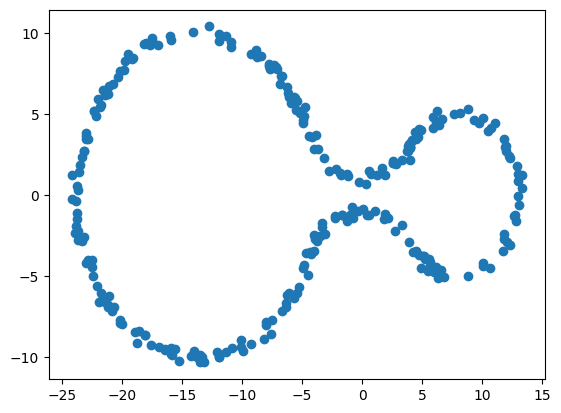

In [83]:
eyeglasses = tadasets.eyeglasses(n=278,r1=10.0, r2=5.0, neck_size=2, noise=0.23, seed=42)
plt.scatter(eyeglasses[:,0], eyeglasses[:,1])
plt.show()

In [84]:
pairwise_dist = pdist(eyeglasses)
diameter = np.max(pairwise_dist)
print(f"Diámetro del conjunto: {diameter:.4f}")

Diámetro del conjunto: 37.5658


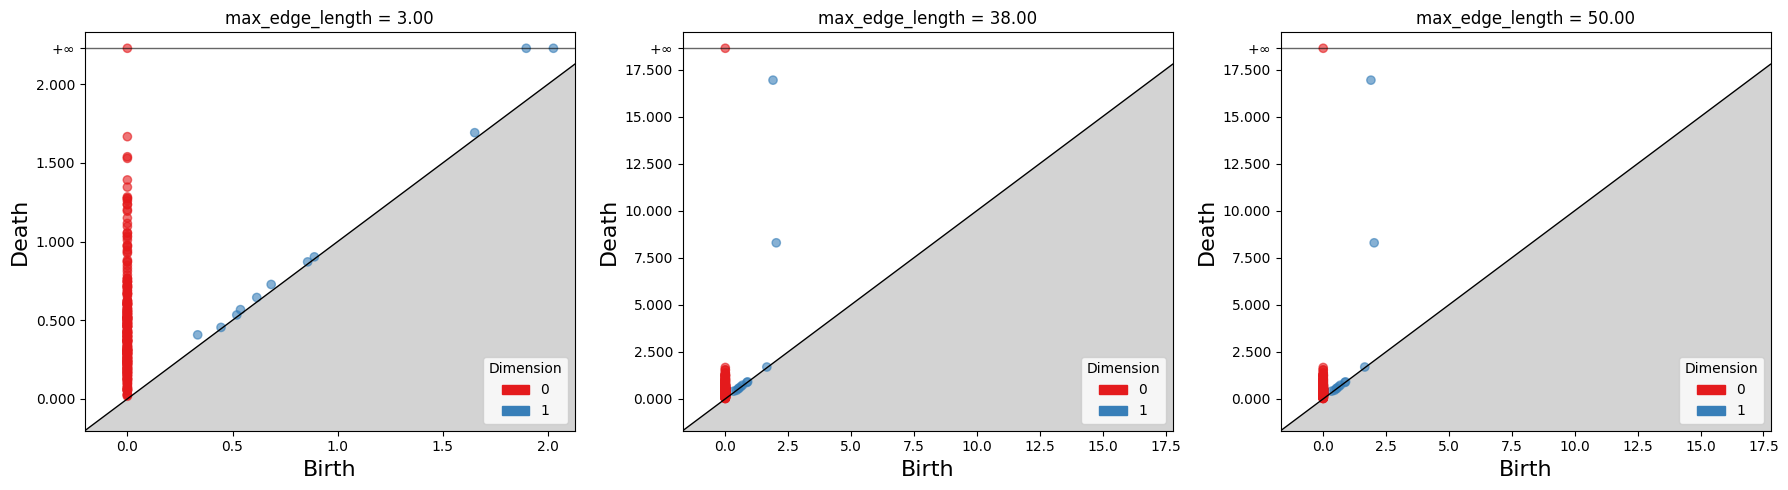

In [85]:
max_edges = [3, np.ceil(diameter),50]  # Tres valores distintos (el último es el diámetro)
diagrams = []

for i, max_edge in enumerate(max_edges):
    rips_complex = gd.RipsComplex(points=eyeglasses, max_edge_length=max_edge)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
    diag = simplex_tree.persistence()
    diagrams.append((max_edge, diag))

# Paso 4: Graficar los diagramas de persistencia
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, (max_edge, diag) in zip(axes, diagrams):
    gd.plot_persistence_diagram(diag, axes=ax)
    ax.set_title(f"max_edge_length = {max_edge:.2f}")

plt.tight_layout()
plt.show()

--------------------BARCODES--------------------


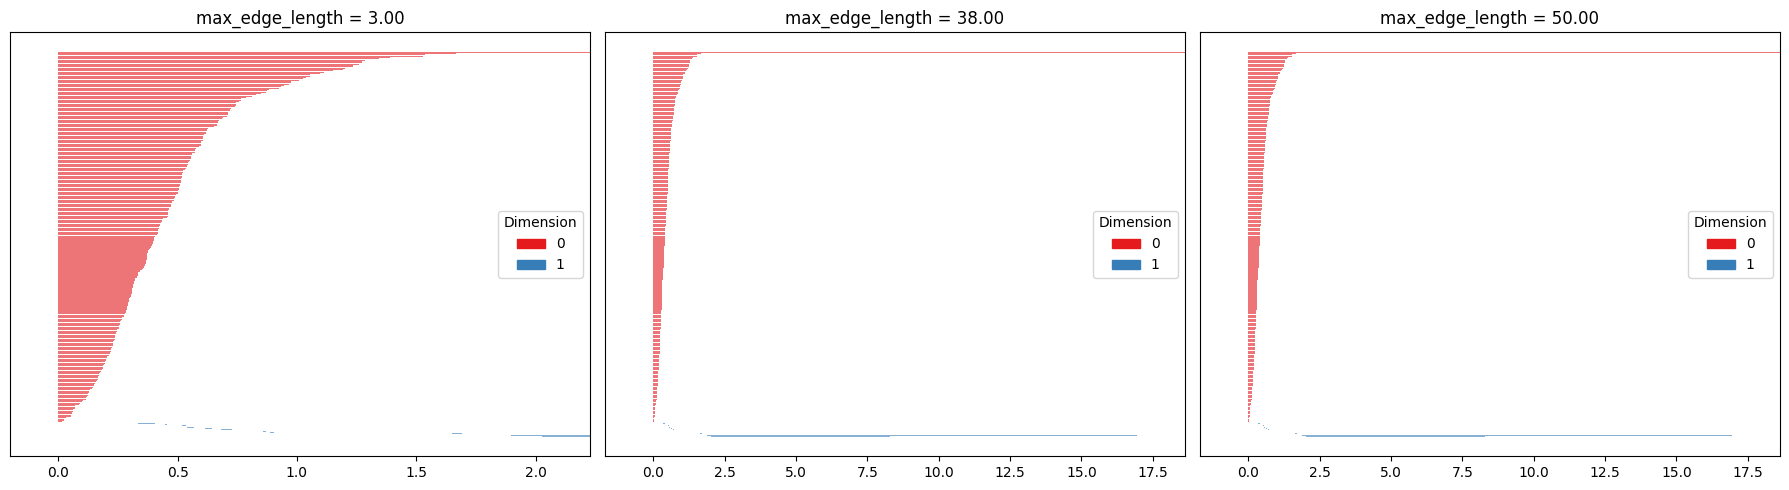

In [86]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

print('--------------------BARCODES--------------------')
for ax, (max_edge, diag) in zip(axes, diagrams):
    gd.plot_persistence_barcode(diag, axes=ax)
    ax.set_title(f"max_edge_length = {max_edge:.2f}")

plt.tight_layout()
plt.show()

--------------------DENSITY PLOTS d1--------------------


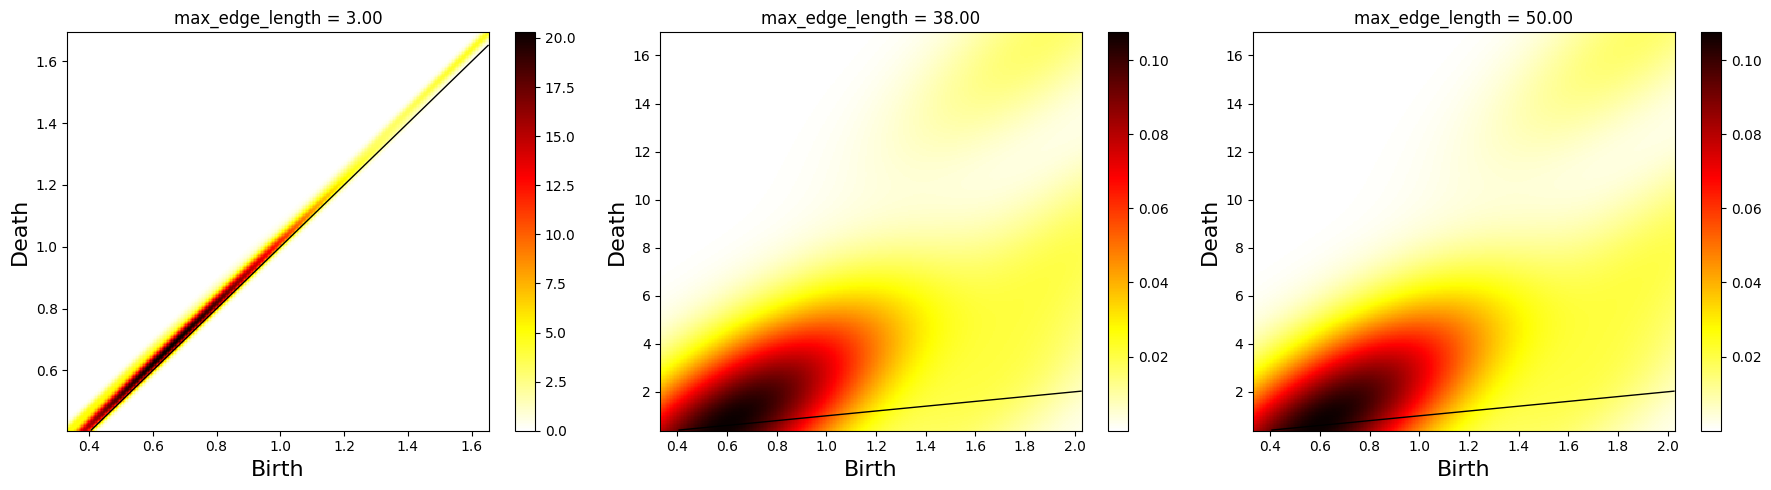

In [87]:
print('--------------------DENSITY PLOTS d1--------------------')
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, (max_edge, diag) in zip(axes, diagrams):
    gd.plot_persistence_density(diag, legend=True, max_intervals=1000,dimension=1, axes=ax)
    ax.set_title(f"max_edge_length = {max_edge:.2f}")

plt.tight_layout()
plt.show()

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


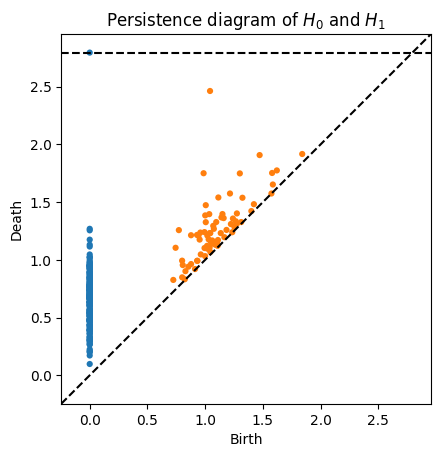

In [89]:
rips = Rips(maxdim=1)
dgms = rips.fit_transform(toro)
H0_dgm = dgms[0]
H1_dgm = dgms[1]

rips.plot(dgms, legend=False, show=False)
plt.title("Persistence diagram of $H_0$ and $H_1$")
plt.show()

-----------IMAGEN DE PERSISTENCIA D1-----------


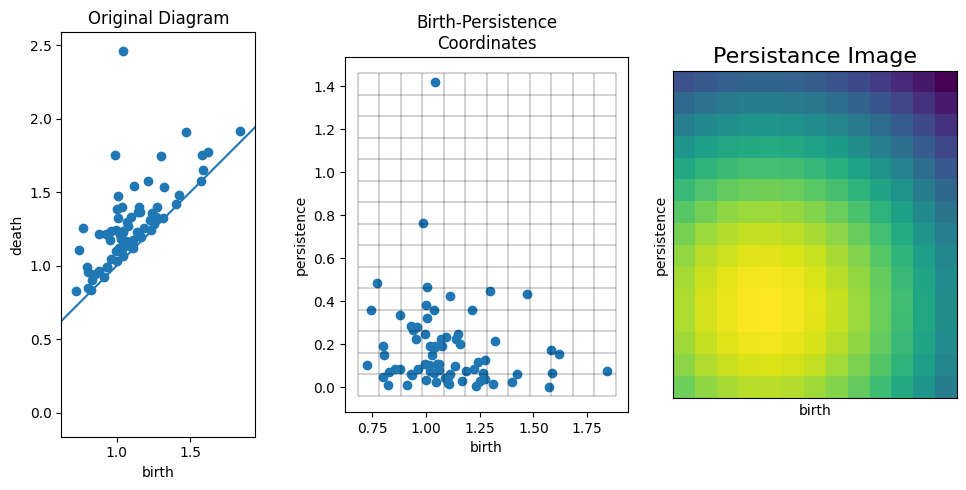

In [90]:
print("-----------IMAGEN DE PERSISTENCIA D1-----------")
pimgr = PersistenceImager(pixel_size=0.1)
pimgr.fit(H1_dgm)

fig, axs = plt.subplots(1, 3, figsize=(10,5))

axs[0].set_title("Original Diagram")
pimgr.plot_diagram(H1_dgm, skew=False, ax=axs[0])

axs[1].set_title("Birth-Persistence\nCoordinates")
pimgr.plot_diagram(H1_dgm, skew=True, ax=axs[1])

pimgr.pixel_size = 0.1
pimgr.plot_image(pimgr.transform(H1_dgm), ax=axs[2])
axs[2].set_title('Persistance Image', fontsize=16)

plt.tight_layout()